In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('owid-covid-data.csv')

# View first few rows
df.head()

# Check column names
print(df.columns)

# Check for missing values
df.isnull().sum()

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

iso_code                                        0
continent                                   11092
location                                        0
date                                            0
total_cases                                  6160
                                            ...  
population                                      1
excess_mortality_cumulative_absolute       195943
excess_mortality_cumulative                195943
excess_mortality                           195943
excess_mortality_cumulative_per_million    195943
Length: 67, dtype: int64

In [2]:
df = df[df['continent'].notna()]

In [3]:
df['total_cases'] = df.groupby('location')['total_cases'].transform(lambda x: x.interpolate())

In [4]:
df = df.drop(columns=[col for col in df.columns if 'excess_mortality' in col])

In [5]:
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
missing_percent[missing_percent > 40]  # Show columns with more than 40% missing for columns with over 40–50% missing data are  unreliable for analysis

weekly_icu_admissions                         95.906784
weekly_icu_admissions_per_million             95.906784
weekly_hosp_admissions_per_million            93.545574
weekly_hosp_admissions                        93.545574
hosp_patients                                 90.611032
hosp_patients_per_million                     90.611032
icu_patients                                  89.762521
icu_patients_per_million                      89.762521
total_boosters                                88.678516
total_boosters_per_hundred                    88.678516
new_vaccinations                              84.795731
people_fully_vaccinated                       82.310247
people_fully_vaccinated_per_hundred           82.310247
people_vaccinated_per_hundred                 82.215214
people_vaccinated                             82.215214
new_tests_per_thousand                        82.185973
new_tests                                     82.185973
total_vaccinations                            80

In [6]:
cols_to_drop = [
    'weekly_icu_admissions', 'weekly_icu_admissions_per_million',
    'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million',
    'icu_patients', 'icu_patients_per_million',
    'hosp_patients', 'hosp_patients_per_million',
    'total_boosters', 'total_boosters_per_hundred',
    'new_vaccinations', 'new_vaccinations_smoothed',
    'new_vaccinations_smoothed_per_million',
    'people_vaccinated', 'people_vaccinated_per_hundred',
    'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
    'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred',
    'total_vaccinations', 'total_vaccinations_per_hundred',
    'new_tests', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
    'total_tests', 'total_tests_per_thousand',
    'tests_per_case', 'positive_rate', 'tests_units',
    'handwashing_facilities', 'stringency_index', 'extreme_poverty',
    'reproduction_rate'
]

df = df.drop(columns=cols_to_drop)

In [7]:
# Define a list of the most useful columns to keep for analysis and visualization
columns_to_keep = [
    'date', 'continent', 'location',
    'total_cases', 'new_cases',
    'total_deaths', 'new_deaths',
    'total_cases_per_million', 'total_deaths_per_million',
    'population', 'median_age', 'gdp_per_capita',
    'life_expectancy', 'human_development_index'
]

df = df[columns_to_keep]

In [8]:
#  list of countries for  analysis
countries = [
    'Kenya', 'Nigeria', 'South Africa',      # Africa
    'India', 'Japan', 'South Korea',         # Asia
    'France', 'Germany', 'United Kingdom',   # Europe
    'United States', 'Brazil', 'Canada',     # Americas
    'Australia', 'New Zealand'               # Oceania
]

# Filter the dataset to include only these countries
df_filtered = df[df['location'].isin(countries)]

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert date column to datetime if not already
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# Set plot style
plt.style.use('seaborn-darkgrid')

# Set figure size
plt.figure(figsize=(14, 8))

# Plot
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time (Selected Countries)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipykernel_973/2614268435.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = pd.to_datetime(df_filtered['date'])


OSError: 'seaborn-darkgrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [10]:
df_filtered.loc[:, 'date'] = pd.to_datetime(df_filtered['date'])

In [11]:
import seaborn as sns
sns.set_style('darkgrid')  # This applies the darkgrid theme via seaborn

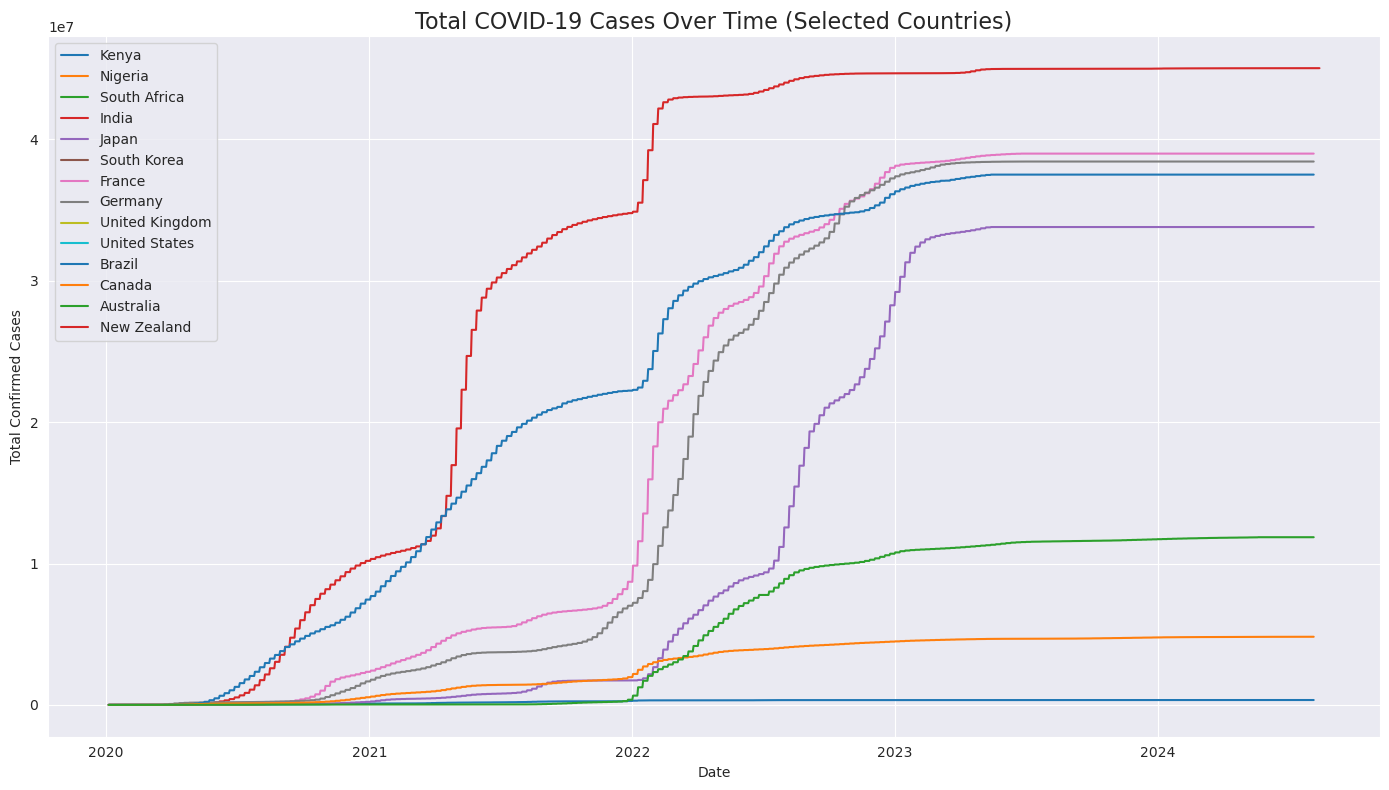

In [12]:
#line plot indicating covid19 cases over time
plt.figure(figsize=(14, 8))

for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time (Selected Countries)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

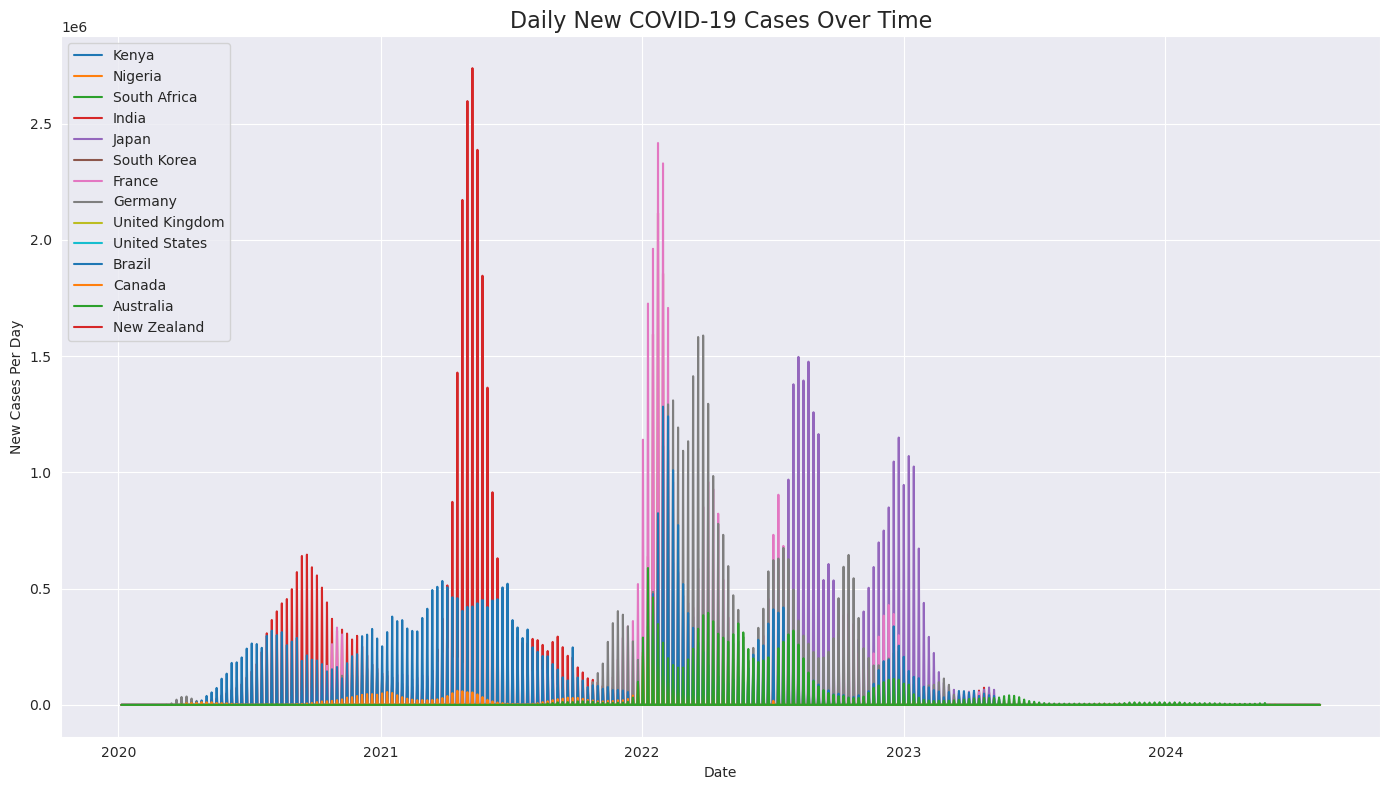

In [13]:
plt.figure(figsize=(14, 8))

for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

plt.title('Daily New COVID-19 Cases Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('New Cases Per Day')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

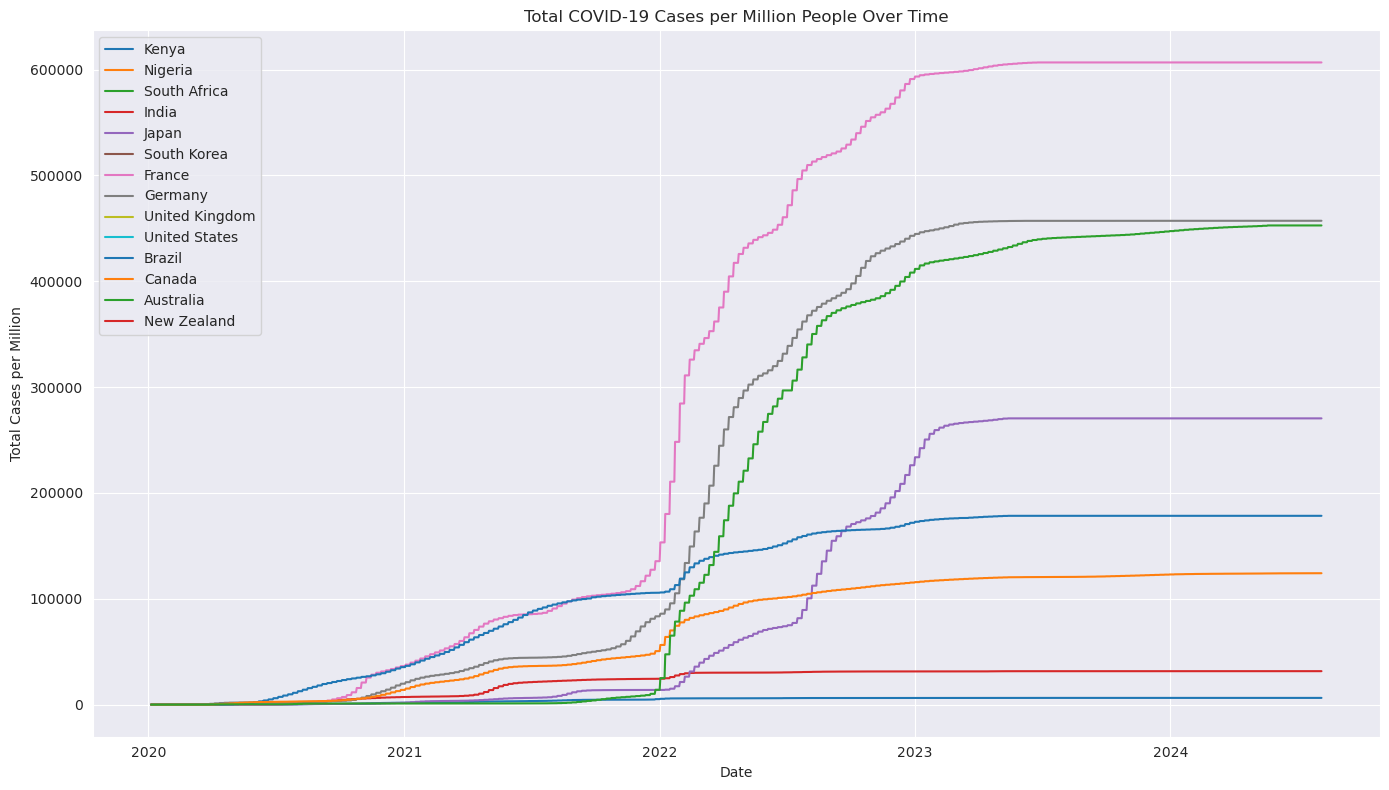

In [14]:
#Comparative Line Plot of COVID-19 Cases per Million
import matplotlib.pyplot as plt

# Create a new figure
plt.figure(figsize=(14, 8))

# Loop through each country and plot its 'total_cases_per_million'
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases_per_million'], label=country)

# Title and labels
plt.title('Total COVID-19 Cases per Million People Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases per Million')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

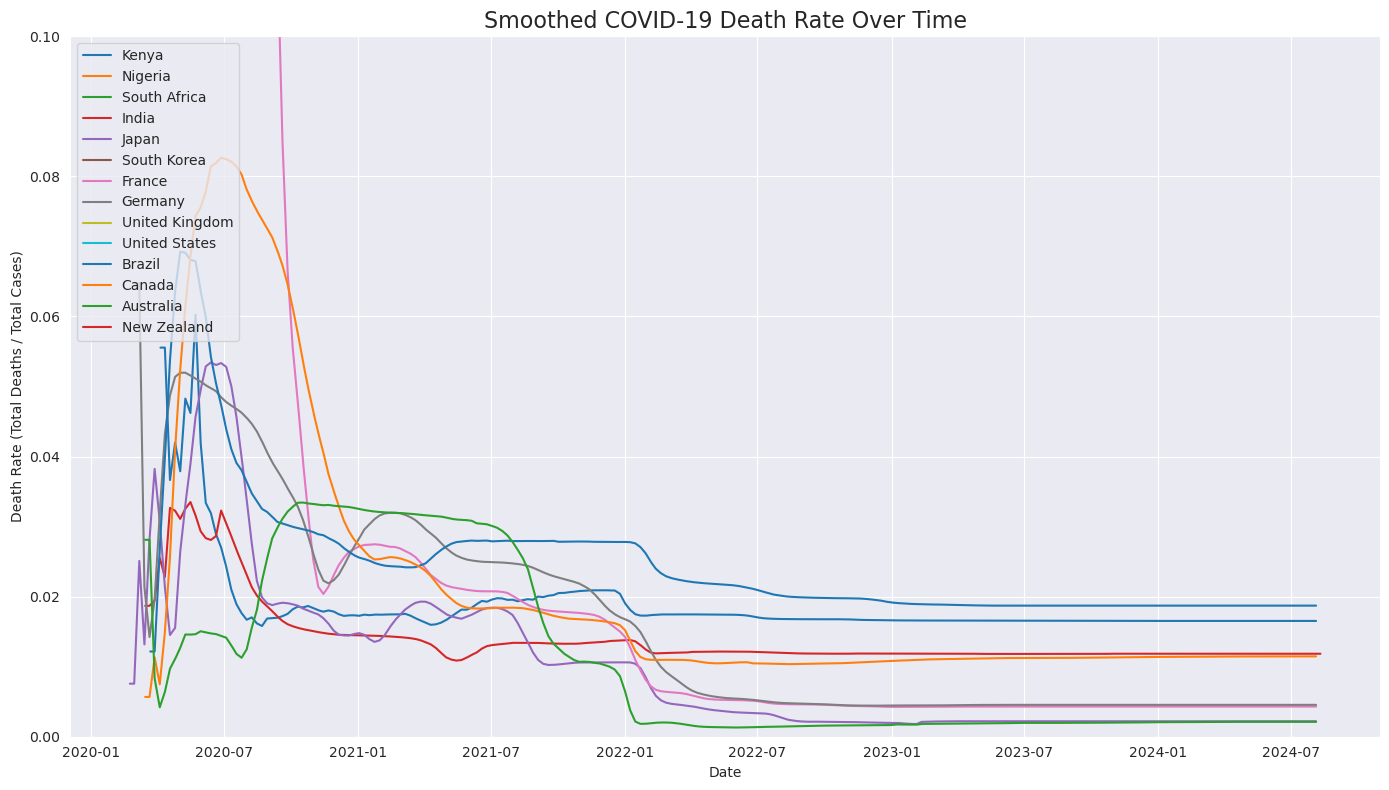

In [15]:
# Filter out low total_cases to avoid dividing by near-zero values
df_filtered = df_filtered[df_filtered['total_cases'] > 100].copy()

# Calculate the death rate
df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases']

# Smooth the death rate with a 7-day rolling average
df_filtered['death_rate_smoothed'] = df_filtered.groupby('location')['death_rate'].transform(
    lambda x: x.rolling(window=7, min_periods=1).mean()
)

# Plot the smoothed death rate
plt.figure(figsize=(14, 8))

for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['death_rate_smoothed'], label=country)

plt.title('Smoothed COVID-19 Death Rate Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Death Rate (Total Deaths / Total Cases)')
plt.legend(loc='upper left')
plt.ylim(0, 0.1)  # Set y-axis limit to 10% death rate
plt.tight_layout()
plt.show()


In [16]:
plt.figure(figsize=(14, 8))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['people_fully_vaccinated_per_hundred'], label=country)

plt.title('People Fully Vaccinated Per 100 People', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Vaccination Rate (%)')
plt.legend()
plt.tight_layout()
plt.show()


KeyError: 'people_fully_vaccinated_per_hundred'

<Figure size 1400x800 with 0 Axes>

In [17]:
print(df_filtered.columns.tolist())


['date', 'continent', 'location', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_cases_per_million', 'total_deaths_per_million', 'population', 'median_age', 'gdp_per_capita', 'life_expectancy', 'human_development_index', 'death_rate', 'death_rate_smoothed']


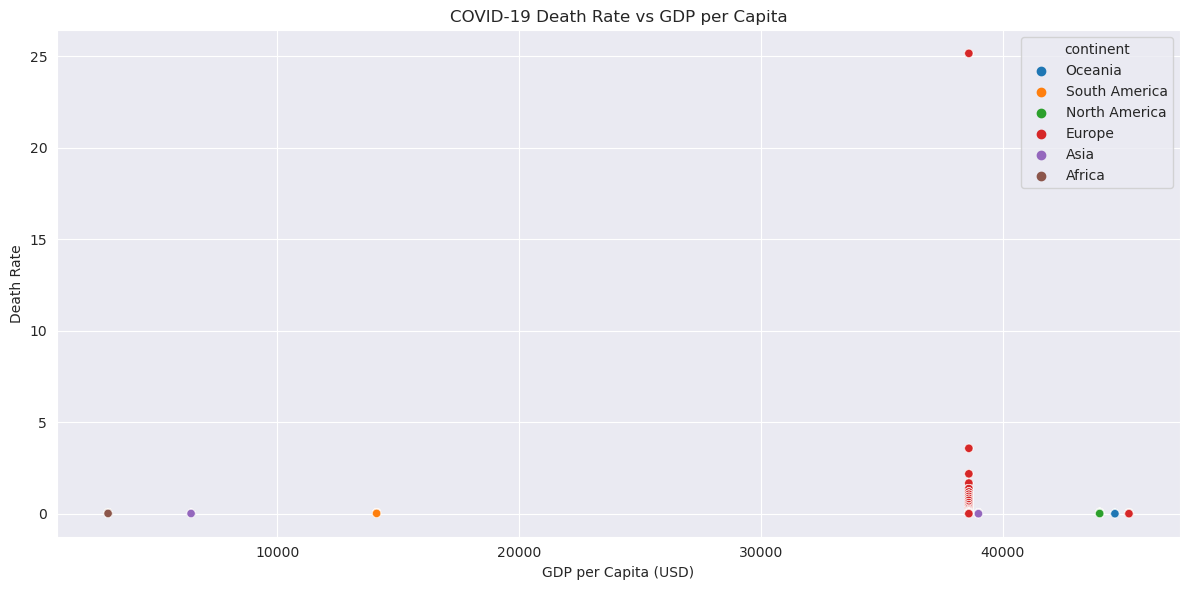

In [18]:

# Scatter Plot: GDP per Capita vs Death Rate
# helps analyse if wealthier nations with high GDP per capita suffered fewer deaths
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_filtered, x='gdp_per_capita', y='death_rate', hue='continent', alpha=0.7)
plt.title('COVID-19 Death Rate vs GDP per Capita')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Death Rate')
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
# Calculate Pearson correlation between GDP and Death Rate
correlation = df_filtered[['gdp_per_capita', 'death_rate']].corr().iloc[0,1]
print(f"Correlation between GDP per capita and Death Rate: {correlation:.2f}")

Correlation between GDP per capita and Death Rate: 0.02


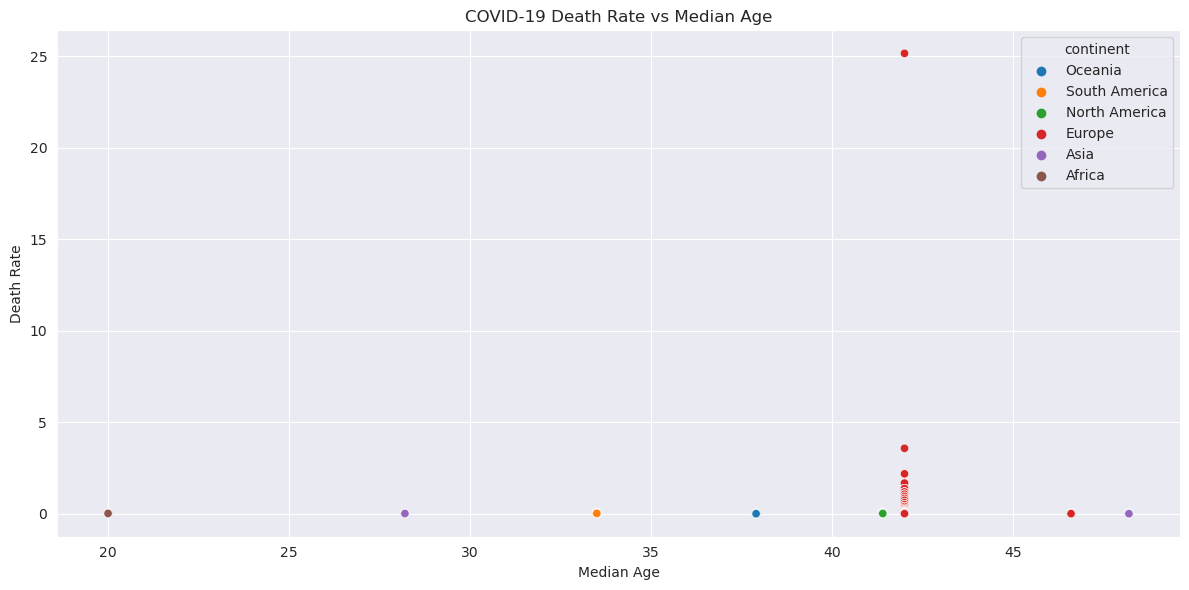

In [20]:

#Scatter Plot: Median Age vs Death Rate
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_filtered, x='median_age', y='death_rate', hue='continent', alpha=0.7)
plt.title('COVID-19 Death Rate vs Median Age')
plt.xlabel('Median Age')
plt.ylabel('Death Rate')
plt.grid(True)
plt.tight_layout()
plt.show()


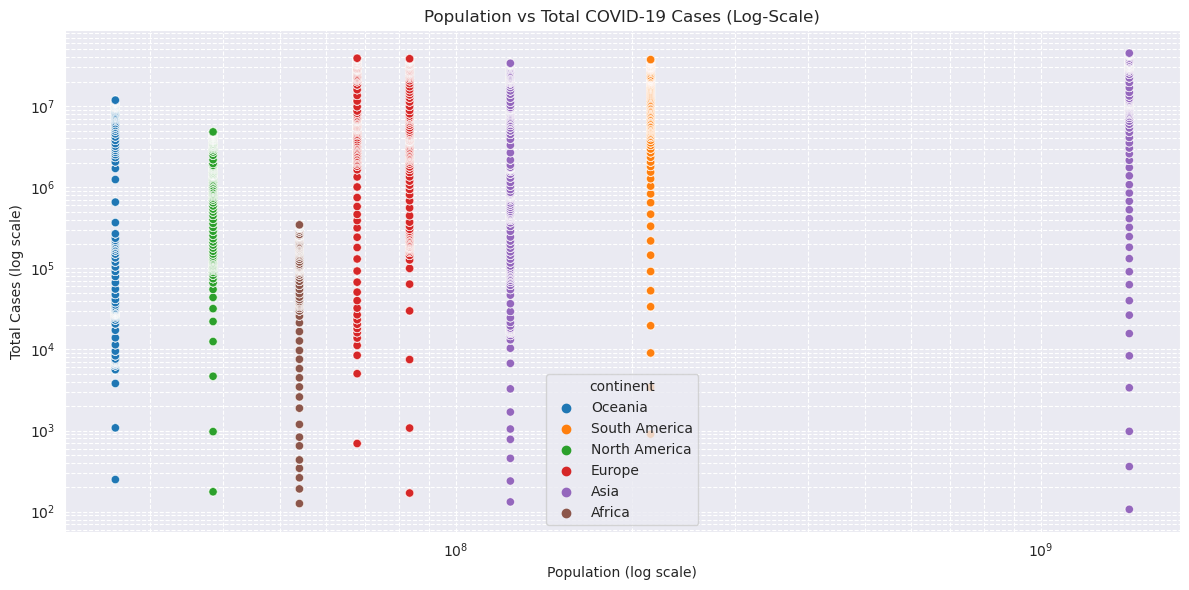

In [21]:

# Scatter Plot: Population vs Total Cases
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_filtered, x='population', y='total_cases', hue='continent', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.title('Population vs Total COVID-19 Cases (Log-Scale)')
plt.xlabel('Population (log scale)')
plt.ylabel('Total Cases (log scale)')
plt.grid(True, which='both', linestyle='--')
plt.tight_layout()
plt.show()


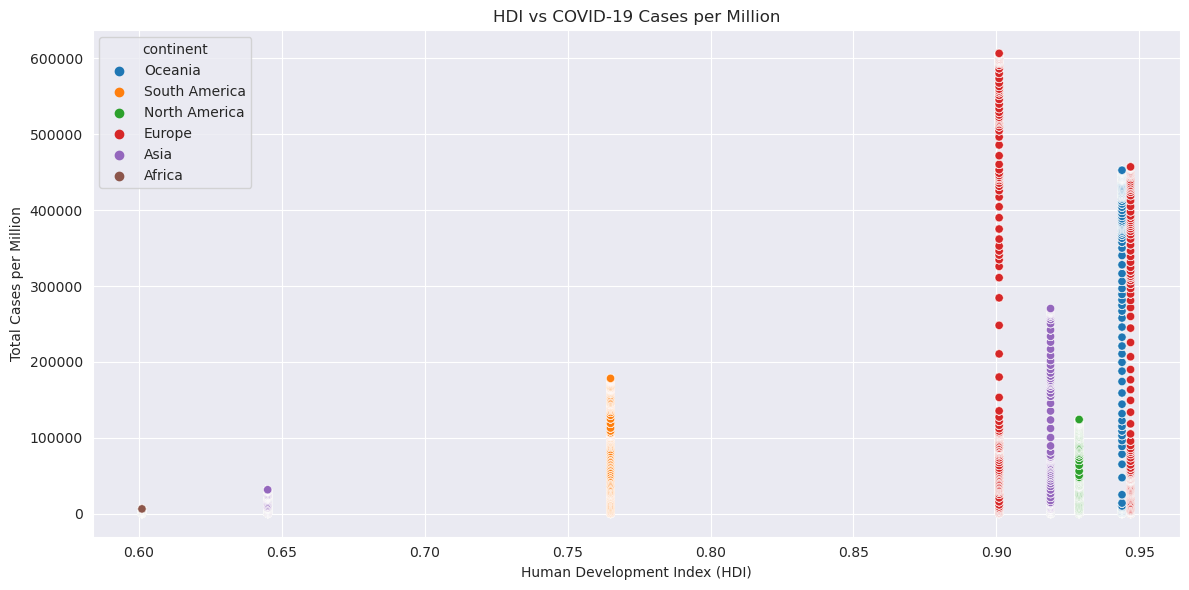

In [22]:
# Scatter Plot: HDI vs Cases Per Million
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_filtered, x='human_development_index', y='total_cases_per_million', hue='continent', alpha=0.7)
plt.title('HDI vs COVID-19 Cases per Million')
plt.xlabel('Human Development Index (HDI)')
plt.ylabel('Total Cases per Million')
plt.grid(True)
plt.tight_layout()
plt.show()
